In [1]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sshekhar1996\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('Combined_News_DJIA.csv')
dataset.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
dataset.shape

(1989, 27)

In [4]:
cols = ['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10',
       'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20',
       'Top21', 'Top22', 'Top23', 'Top24', 'Top25']
dataset['combined headlines'] = dataset[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [5]:
corpus = []
for i in range(0,1989):
    review = re.sub("b[(')]", '', dataset['combined headlines'][i])
    review = re.sub('b[(")]', '', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

corpus[0]

'georgia down two russian warplan countri move brink war break musharraf impeach russia today column troop roll south ossetia footag fight youtub russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire afghan children rape impun u n offici say sick three year old rape noth russian tank enter south ossetia whilst georgia shoot two russian jet break georgia invad south ossetia russia warn would interven side enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like georgian troop retreat osettain capit presum leav sever hundr peopl kill video u prep georgia war russia rice give green light israel attack iran say u veto isra militari op announc class action lawsuit behalf american public fbi russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal china tell bush stay countri affair world war iii start today georgia invad south ossetia russia get involv nato absorb georgia unleash full scale

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [7]:
len(X[0])

21701

In [8]:
# ##Dimensionality Reduction using PCA 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

Text(0.5, 0, 'Principal Components')

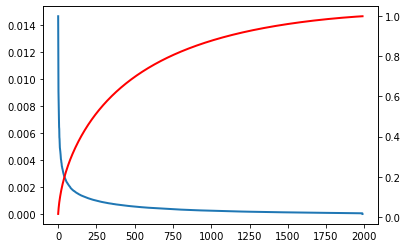

In [9]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax1.plot(pca.explained_variance_ratio_[:10000], linewidth=2)
ax2.plot(pca.explained_variance_ratio_.cumsum()[:10000], linewidth=2, color='r')
plt.xlabel("Principal Components")

In [10]:
cv1 = CountVectorizer(max_features=2000)
X1 = cv1.fit_transform(corpus).toarray()

In [11]:
Y = dataset.iloc[:,1].values
Y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [12]:
X1.shape

(1989, 2000)

In [13]:
Y.shape

(1989,)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.22 %
Standard Deviation: 3.73 %


In [16]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 0)
classifier1.fit(x_train, y_train)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 52.23 %
Standard Deviation: 3.06 %


In [17]:
##Use SVC Classifier to predict as it has higher accuracy on training set
y_pred = classifier1.predict(x_test)

In [18]:
##Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 45 148]
 [ 40 165]]


0.5276381909547738